<a href="https://colab.research.google.com/github/18sarru/Leaky-integrate-fire-nuerons-on-MNIST/blob/main/lif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline

In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Spiking-Neural-Network-master')
from neurons import LIFNeuron as LIF
from utils import graph_results as graph

In [3]:
!pip install python-mnist
from mnist import MNIST 

In [4]:
T         = 20   #50    # total time to sumulate (msec)
dt        = 0.0125 # Simulation timestep
time      = int(T / dt)

debug=True

In [5]:
'''mndata = MNIST('./mnist')
images, labels = mndata.load_training()

from mlxtend.data import loadlocal_mnist
import platform
if not platform.system() == 'Windows':
    images, labels = loadlocal_mnist(
            images_path='train-images-idx3-ubyte', 
            labels_path='train-labels-idx1-ubyte')

else:
    images, labels= loadlocal_mnist(
            images_path='train-images.idx3-ubyte', 
            labels_path='train-labels.idx1-ubyte')
            
    '''
import tensorflow as tf
(images, labels), (
    test_images,
    test_labels,
) = tf.keras.datasets.mnist.load_data()
def get_next_image(index=0):
    return images[index]
    
image = get_next_image(index=0)  #rendering

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
image=np.asarray(image).reshape((28,28))
image_norm = (image * 255.0/image.max()) / 255.
print(image_norm)
print(image.shape)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [7]:
stride = (4,2)   # TODO: This will be 4 on-centre neurons, 2 surround (off-centre) neurons  /////////// we create a set of kernels for image
stride_size = stride[0] + stride[1]
len_x, len_y = image.shape
x_max = int(len_x/stride[0])
y_max = int(len_y/stride[0])
print ('Convolution Dimensions: x={} / y={}'.format(x_max, y_max))  #', starting at x={}, y={}'.format(x_max, y_max, x_count, y_count))

Convolution Dimensions: x=7 / y=7


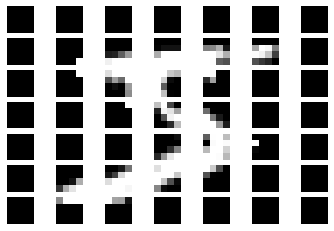

In [8]:
fig = plt.figure() #int(x_max+1) * int(y_max+1))
x_count, y_count = 1, 1

for y in range (0, len_y, stride[0]):
    x_count = 1
    for x in range(0, len_x, stride[0]):
        x_end = x + stride[0]
        y_end = y + stride[0]
        kernel = image_norm[y:y_end, x:x_end]
        #orientation = s1(kernel)
        a = fig.add_subplot(y_max, x_max, (y_count-1)*x_max+x_count)
        a.axis('off')
        plt.imshow(kernel, cmap="gray")    
        x_count += 1
    y_count += 1
plt.show()    

In [9]:
''''
Process the image 1 pixel at a time

First create a set of neurons for each of the pixels. Assume 1-to-1 mapping, and no concept of a retinal unit. This will come later.
'''
neurons = []
print('Creating {} x {} neurons'.format(len_x, len_y))
for y in range (0, len_y, 1):
    neuron_row=[]
    for x in range(0, len_x, 1):
        neuron_row.append(LIF.LIFNeuron(neuron_label="{}/{}".format(y,x), debug=debug))
    neurons.append(neuron_row)

Creating 28 x 28 neurons
LIFNeuron(0/0): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/1): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/2): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/3): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/4): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/5): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/6): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/7): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/8): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/9): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/10): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/11): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(0/12): Created Leaky Integrate and Fire neuron starting at time

In [10]:
start_x = 5
start_y = 5

print(len_x, len_y)

28 28


In [11]:
# applying stimulus

#for y in range(0, len_y, start_y + stride_size, 1):
#    for x in range(start_x, start_x + stride_size, 1):
for y in range(0, len_y, 1):
    for x in range(0, len_x, 1):
        stimulus = np.full((time), image_norm[y,x])
        print('Stimulus from image @ {}/{}: {}'.format(y, x, stimulus))
        print('Processing spike generator for neuron {}/{}: {}'.format(y,x,neurons[y][x].neuron_label))
        neurons[y][x].spike_generator(stimulus)
        print('Stats for neuron {},{}: time={}, stimulus={}, spikes={}' \
              .format(x,y,time, stimulus.shape, neurons[y][x].spikes)) #.shape))
        #graph.plot_membrane_potential(neurons[neuron_x][neuron_y].time, neurons[neuron_x][neuron_y].Vm, 'Membrane Potential {}'.format(neurons[neuron_x][neuron_y].type), neuron_id = "{}/{}".format(neuron_x, neuron_y))
        #graph.plot_spikes(neurons[neuron_x][neuron_y].time, neurons[neuron_x][neuron_y].spikes, 'Output spikes for {}'.format(neurons[neuron_x][neuron_y].type), neuron_id = "{}/{}".format(neuron_x, neuron_y))

Stimulus from image @ 0/0: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 0/0: 0/0
LIFNeuron.spike_generator(0/0).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(0/0).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 0,0: time=1600, stimulus=(1600,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 0/1: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 0/1: 0/1
LIFNeuron.spike_generator(0/1).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(0/1).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 1,0: time=1600, stimulus=(1600,), spikes=[0. 0. 0. ... 0. 0. 0.]
Stimulus from image @ 0/2: [0. 0. 0. ... 0. 0. 0.]
Processing spike generator for neuron 0/2: 0/2
LIFNeuron.spike_generator(0/2).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(0/2).exit_state(Vm=(

In [12]:
#Sample a neuron to see how it behaves under stimulus from the image
ny, nx = 5, 21
print(neurons[ny][nx].time.shape)
print(neurons[ny][nx].spikes.shape)
print(neurons[ny][nx].Vm.shape)

(1601,)
(1601,)
(1601,)


In [13]:
print(neurons[ny][nx].neuron_label)

5/21


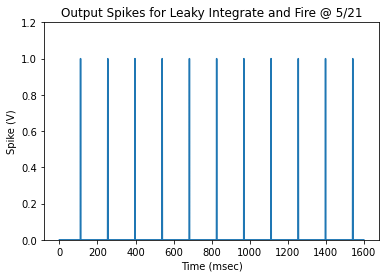

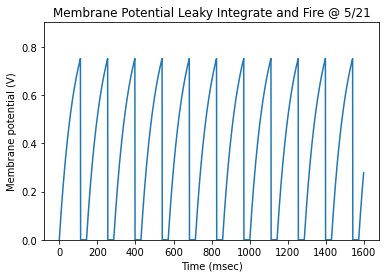

In [14]:
graph.plot_spikes(neurons[ny][nx].time, neurons[ny][nx].spikes, 
            'Output Spikes for {}'.format(neurons[ny][nx].type), neuron_id = '{}/{}'.format(ny, nx))
graph.plot_membrane_potential(neurons[ny][nx].time, neurons[ny][nx].Vm, 
            'Membrane Potential {}'.format(neurons[ny][nx].type), neuron_id = '{}/{}'.format(ny, nx))

In [15]:
#second layer
l2_neurons_x = int(len_x / stride[0])
l2_neurons_y = int(len_y / stride[0])
print ('Creating layer 2 neurons: {} by {}'.format(l2_neurons_y, l2_neurons_x))

Creating layer 2 neurons: 7 by 7


In [16]:
l2_neurons = []

for y in range(l2_neurons_y):
    l2_neuron_row = []
    for x in range(l2_neurons_x):
        l2_neuron_row.append(LIF.LIFNeuron(neuron_label="L2:{}/{}".format(y,x), debug=debug))
    l2_neurons.append(l2_neuron_row)

LIFNeuron(L2:0/0): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/1): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/2): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/3): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/4): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/5): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/6): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/0): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/1): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/2): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/3): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/4): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/5): Created Leaky Integrate and Fire neuron start

In [17]:
l2_neuron_stimulus = np.zeros((l2_neurons_y, l2_neurons_x, time))

In [18]:
mult_factor = 49           # Number of neurons for each pixel (this is a hack to reduce processing earlier,... 
                          # raise to 49 perhaps later!)
l2x, l2y = 0,0
for ry in range (0, len_y, stride[0]):
    l2x = 0
    for rx in range(0, len_x, stride[0]):
        #x_end = rx + stride[0]
        #y_end = ry + stride[0]       
        stimulus_ret_unit = np.zeros(time)
        print('Generating stimulus for L2 neurons {}/{}'.format(l2y, l2x))
        for ny in range(stride[0]):
            for nx in range(stride[0]):
                x = rx + nx
                y = ry + ny
                print ('Processing stimulus for L1 neuron at {},{}'.format(y,x))
                print ('Adding stimulus {}'.format(neurons[y][x].spikes[:time]))
                stimulus_ret_unit += neurons[y][x].spikes[:time] * mult_factor
        print ('Adding stimulus for l2 neuron {},{}, duration={}\n'.format(l2y, l2x, len(stimulus_ret_unit)))
        l2_neuron_stimulus[l2y,l2x,:] = stimulus_ret_unit
        l2x += 1
    l2y += 1


Generating stimulus for L2 neurons 0/0
Processing stimulus for L1 neuron at 0,0
Adding stimulus [0. 0. 0. ... 0. 0. 0.]
Processing stimulus for L1 neuron at 0,1
Adding stimulus [0. 0. 0. ... 0. 0. 0.]
Processing stimulus for L1 neuron at 0,2
Adding stimulus [0. 0. 0. ... 0. 0. 0.]
Processing stimulus for L1 neuron at 0,3
Adding stimulus [0. 0. 0. ... 0. 0. 0.]
Processing stimulus for L1 neuron at 1,0
Adding stimulus [0. 0. 0. ... 0. 0. 0.]
Processing stimulus for L1 neuron at 1,1
Adding stimulus [0. 0. 0. ... 0. 0. 0.]
Processing stimulus for L1 neuron at 1,2
Adding stimulus [0. 0. 0. ... 0. 0. 0.]
Processing stimulus for L1 neuron at 1,3
Adding stimulus [0. 0. 0. ... 0. 0. 0.]
Processing stimulus for L1 neuron at 2,0
Adding stimulus [0. 0. 0. ... 0. 0. 0.]
Processing stimulus for L1 neuron at 2,1
Adding stimulus [0. 0. 0. ... 0. 0. 0.]
Processing stimulus for L1 neuron at 2,2
Adding stimulus [0. 0. 0. ... 0. 0. 0.]
Processing stimulus for L1 neuron at 2,3
Adding stimulus [0. 0. 0. ...

In [19]:
for y in range(l2_neurons_y):
    for x in range(l2_neurons_x):
        print('\nProcessing L2 Neuron {},{} with stimulus length {}'.format(y,x,l2_neuron_stimulus[y][x]))
        l2_neurons[y][x].spike_generator(l2_neuron_stimulus[y][x])


Processing L2 Neuron 0,0 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/0).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(L2:0/0).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)

Processing L2 Neuron 0,1 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/1).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(L2:0/1).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)

Processing L2 Neuron 0,2 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/2).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(L2:0/2).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)

Processing L2 Neuron 0,3 with stimulus length [0. 0. 0. ... 0. 0. 0.]
LIFNeuron.spike_generator(L2:0/3).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNe

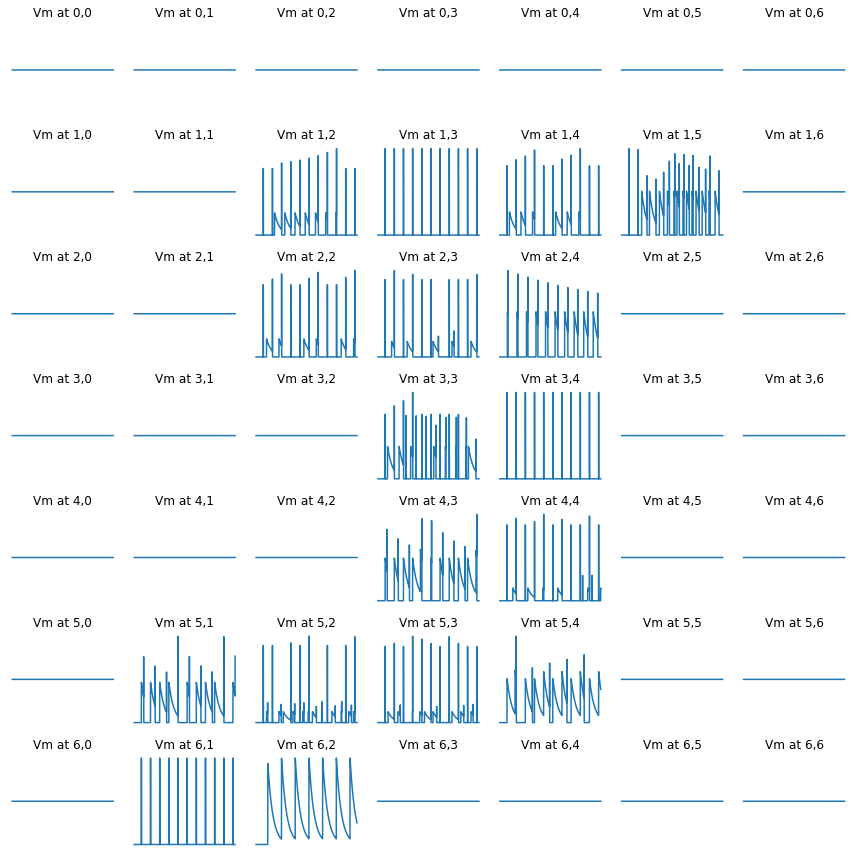

In [20]:
#fig, axes = plt.subplots(ncols=l2_neurons_x, nrows=l2_neurons_y, figsize=(10,10))
fig=plt.figure(figsize=(12,12))
fig.set_tight_layout({5,2,5})

for y in range(l2_neurons_y):
    for x in range(l2_neurons_x):
        index=(y)*l2_neurons_x+x+1
        id = "{}{}{}".format(l2_neurons_y, l2_neurons_x,index)
        a=fig.add_subplot(l2_neurons_y, l2_neurons_x, index)
        a.plot(l2_neurons[y][x].time, l2_neurons[y][x].Vm)
        a.axis('off')
        plt.title('Vm at {},{}'.format(y,x))
        
plt.show()

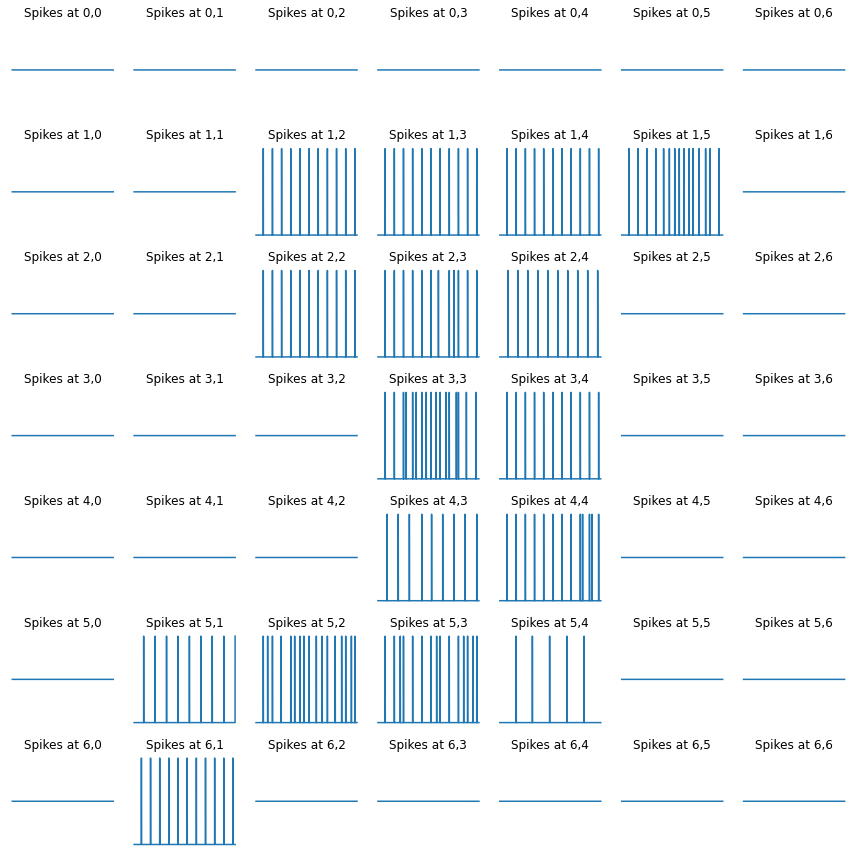

In [21]:
#fig, axes = plt.subplots(ncols=l2_neurons_x, nrows=l2_neurons_y, figsize=(10,10))
fig=plt.figure(figsize=(12,12))
fig.set_tight_layout({5,2,5})

for y in range(l2_neurons_y):
    for x in range(l2_neurons_x):
        index=(y)*l2_neurons_x+x+1
        id = "{}{}{}".format(l2_neurons_y, l2_neurons_x,index)
        a=fig.add_subplot(l2_neurons_y, l2_neurons_x, index)
        a.plot(l2_neurons[y][x].time, l2_neurons[y][x].spikes)
        a.axis('off')
        plt.title('Spikes at {},{}'.format(y,x))
        
plt.show()